## Usando distancia coseno (~26 minutos total)

No utiliza Google Drive

In [1]:
%cd /content/
!rm -rf convnet2
# Clonamos el repositorio
!git clone https://github.com/alvaro-neira/convnet2.git --branch tarea1

/content
Cloning into 'convnet2'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (509/509), done.
remote: Compressing objects: 100% (345/345), done.
remote: Total 509 (delta 334), reused 303 (delta 153), pack-reused 0
Receiving objects: 100% (509/509), 301.15 KiB | 4.86 MiB/s, done.
Resolving deltas: 100% (334/334), done.


In [2]:
!pwd  # muestra el directorio actual
!ls   # muestra el contenido de este (archivos y directorios)

/content
convnet2  sample_data


## Preparación de los datos

In [3]:
# Crear directorios para datos y snapshots
!mkdir -p /content/convnet2/snapshots
!mkdir -p /content/convnet2/logs
!mkdir -p /content/convnet2/data

!ls convnet2

configs   models	      ssearch.py	     train_siamese.py
data	  README.md	      ssearch_with_merge.py  train_simple.py
datasets  release_siamese.py  test_tfrecords.py      utils
logs	  snapshots	      train.py


In [4]:
# Descargar y descomprimir los datos
%cd /content/convnet2/data
!wget https://www.dropbox.com/sh/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa -O data.zip
!unzip -q -o data.zip
!unzip -q -o train_images.zip
!unzip -q -o test_images.zip
!rm data.zip
!rm train_images.zip
!rm test_images.zip
!ls

/content/convnet2/data
--2021-11-14 22:11:37--  https://www.dropbox.com/sh/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa [following]
--2021-11-14 22:11:37--  https://www.dropbox.com/sh/raw/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc52c4581505694a3a86b6b9d7be.dl.dropboxusercontent.com/zip_download_get/A9Vs6hz6UIKv3lU5zjXsZsVHEuV0oTPCoel3wXh7Dyu86JRzhBZCgDIffmQRufwa6joGaMemPXUGBgSi5msifm1vIvKXCVQBVyNryMHxcyQ_eg# [following]
--2021-11-14 22:11:37--  https://uc52c4581505694a3a86b6b9d7be.dl.dropboxusercontent.com/zip_download_get/A9Vs6hz6UIKv3lU5zjXsZsVHEuV0oTPCoel3wXh7Dyu86JRzhBZCgDIffmQRuf

## Generación de TFRecords


In [5]:
!mkdir -p /content/convnet2/data/sketch_folder


In [6]:
# Creamos los tfrecords ~3 minutos
%cd /content/convnet2
!git fetch --all
!git checkout ssearch_tfr
!git pull origin ssearch_tfr
!cp tarea1/train.txt /content/convnet2/data/sketch_folder
!cp tarea1/test.txt /content/convnet2/data/sketch_folder
!python datasets/create_tfrecords.py -type all -config configs/aneira_tfr.config -name SKETCH


/content/convnet2
Fetching origin
Branch 'ssearch_tfr' set up to track remote branch 'ssearch_tfr' from 'origin'.
Switched to a new branch 'ssearch_tfr'
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch_tfr -> FETCH_HEAD
Already up to date.
---0
---500
---1000
---1500
---2000
---2500
---3000
---3500
---4000
---4500
---5000
---5500
---6000
---6500
---7000
---7500
---8000
---8500
---9000
---9500
---10000
---10500
---11000
---11500
---11999
train_record saved at /content/convnet2/data/sketch_folder/train.tfrecords.
mean_file (224, 224, 3)
mean_file saved at /content/convnet2/data/sketch_folder/mean.dat.
shape_file saved at /content/convnet2/data/sketch_folder/shape.dat.
---0
---500
---1000
---1500
---2000
---2398
test_record saved at /content/convnet2/data/sketch_folder/test.tfrecords.
tfrecords created for /content/convnet2/data/sketch_folder


In [7]:
!ls /content/convnet2/data

mapping.txt  sketch_folder  test_images  train_images


## Entrenamiento

A continuación, entrenaremos los modelos ResNet con los datos recién generados.

### ResNet-34



In [8]:
%cd /content/convnet2
!git fetch --all
!git checkout ssearch_tfr_resnet34
!git pull origin ssearch_tfr_resnet34
!rm -rf snapshots/*
!python train_simple.py -mode train -config configs/aneira_tfr.config -name SKETCH # ~12 minutos

/content/convnet2
Fetching origin
Branch 'ssearch_tfr_resnet34' set up to track remote branch 'ssearch_tfr_resnet34' from 'origin'.
Switched to a new branch 'ssearch_tfr_resnet34'
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch_tfr_resnet34 -> FETCH_HEAD
Already up to date.
2021-11-14 22:15:06.478501: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 

## Predicciones



In [9]:
%cd /content/
!find . -name \*.dat

/content
./convnet2/data/sketch_folder/shape.dat
./convnet2/data/sketch_folder/mean.dat


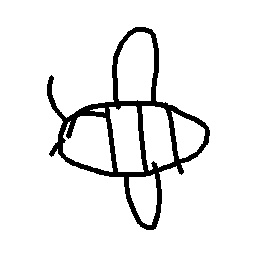

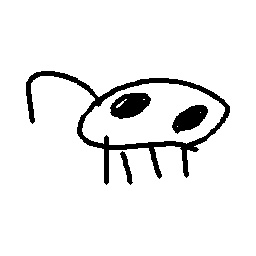

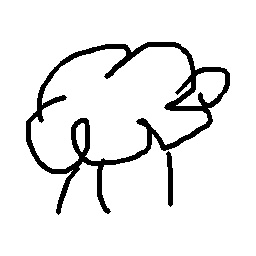

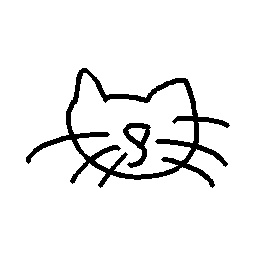

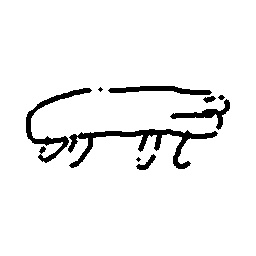

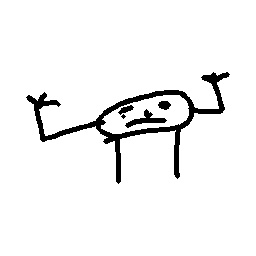

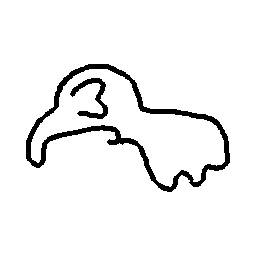

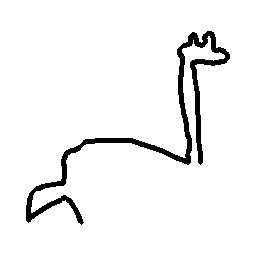

In [10]:
from IPython.display import Image, display

display(Image('/content/convnet2/data/test_images/bee/026_00119695.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/cow/081_00122082.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/sheep/258_00124921.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/cat/064_00122151.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/crocodile/084_00126855.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/crab/082_00125929.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/elephant/103_00125872.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/giraffe/129_00126181.jpg', width=100, height=100))

In [11]:
%cd /content/convnet2
!git fetch --all
!git checkout resnet34_prediction
!git pull origin resnet34_prediction
!mkdir -p /content/convnet2/data/sketch_folder/ssearch/
!cp tarea1/catalog.txt /content/convnet2/data/sketch_folder/ssearch/
!python train_simple.py -mode predict -config configs/aneira_tfr.config -name SKETCH # no delay


/content/convnet2
Fetching origin
Branch 'resnet34_prediction' set up to track remote branch 'resnet34_prediction' from 'origin'.
Switched to a new branch 'resnet34_prediction'
From https://github.com/alvaro-neira/convnet2
 * branch            resnet34_prediction -> FETCH_HEAD
Already up to date.
2021-11-14 22:27:40.936695: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 clas

## Busqueda por similitud

In [12]:
# Calculamos los feature vectors <1 minuto
%cd /content/convnet2/
!git fetch --all
!git checkout ssearch
!git pull origin ssearch
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode compute

/content/convnet2
Fetching origin
Branch 'ssearch' set up to track remote branch 'ssearch' from 'origin'.
Switched to a new branch 'ssearch'
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch    -> FETCH_HEAD
Already up to date.
2021-11-14 22:27:49.580783: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple             

In [13]:
# Búsqueda por similitud antigua
%cd /content/convnet2/
!git fetch --all
!git checkout ssearch
!git pull origin ssearch
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode search

/content/convnet2
Fetching origin
Already on 'ssearch'
Your branch is up to date with 'origin/ssearch'.
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch    -> FETCH_HEAD
Already up to date.
2021-11-14 22:28:36.361761: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple                  0 (unused)
                     

## Metricas (la parte mas importante!)


In [14]:
%cd /content/convnet2
!git fetch --all
!git checkout metrics
!git pull origin metrics
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode tarea1 # < 7 minutos

/content/convnet2
Fetching origin
Branch 'metrics' set up to track remote branch 'metrics' from 'origin'.
Switched to a new branch 'metrics'
From https://github.com/alvaro-neira/convnet2
 * branch            metrics    -> FETCH_HEAD
Already up to date.
2021-11-14 22:28:47.449513: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple             

In [15]:
%cd /content/convnet2
!git fetch --all
!git checkout metrics
!git pull origin metrics
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode chart # ~7 minutos

/content/convnet2
Fetching origin
Already on 'metrics'
Your branch is up to date with 'origin/metrics'.
From https://github.com/alvaro-neira/convnet2
 * branch            metrics    -> FETCH_HEAD
Already up to date.
2021-11-14 22:37:22.846894: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple                  0 (unused)
                     

## Graficos

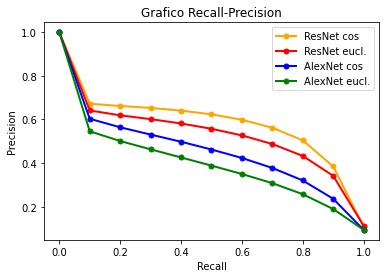

In [17]:
import matplotlib.pyplot as plt
recall = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

pr_resnet_cos=  [1, 0.6721791644226344, 0.6617073045519004, 0.6529503503816968, 0.6404525708350841, 0.6234396993387132, 0.5987294588181195, 0.5618770266586074, 0.5040498176154983, 0.38435109360159286, 0.10719941963643854]
pr_resnet_eu=[1, 0.6413284521866514, 0.6189012780731932, 0.6014926597386753, 0.5815689886148528, 0.557138776753566, 0.5268680964224007, 0.48733190733479637, 0.4327333736666251, 0.34133948830851246, 0.1119142029232468]
pr_alex_cos = [1, 0.6030622978044692, 0.5640527647876532, 0.5307108337177999, 0.4977641365086941, 0.4621900495441424, 0.4233040769266742, 0.3774300589554854, 0.32009831639997344, 0.23607410770646797, 0.09336547474134026]
pr_alex_eu = [1, 0.5456095583567377, 0.5010608390731737, 0.4629729748952049, 0.42567121936099234, 0.38827407834045585, 0.34984568674813404, 0.3077455144911413, 0.25707778758533534, 0.1890278549756104, 0.09380918283201867]


a = plt.plot(recall, pr_resnet_cos, color='orange', marker='o', linestyle='-', linewidth=2, markersize=5, label = 'ResNet cos')
b = plt.plot(recall, pr_resnet_eu, color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='ResNet eucl.')
c = plt.plot(recall, pr_alex_cos, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='AlexNet cos')
d = plt.plot(recall, pr_alex_eu, color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='AlexNet eucl.')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Grafico Recall-Precision')
plt.show()

#[b,c,d,e] = plot(a)
#legend([a,b,c,d], ["a","b","c","d"], loc=1)
#show()

In [20]:
%cd /content/convnet2/
!git fetch --all
!git checkout cosine
!git pull origin cosine
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode search

/content/convnet2
Fetching origin
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/alvaro-neira/convnet2
   c493873..949fe6f  cosine     -> origin/cosine
Already on 'cosine'
Your branch is behind 'origin/cosine' by 1 commit, and can be fast-forwarded.
  (use "git pull" to update your local branch)
From https://github.com/alvaro-neira/convnet2
 * branch            cosine     -> FETCH_HEAD
Updating c493873..949fe6f
Fast-forward
 ssearch.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
2021-11-14 23:05:27.414732: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 

In [24]:
%cd /content/convnet2
!git fetch --all
!git checkout cosine2
!git pull origin cosine2
!python train_simple.py -mode predict -config configs/aneira_tfr.config -name SKETCH # no delay

/content/convnet2
Fetching origin
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/alvaro-neira/convnet2
   3911bbf..6c0b998  cosine2    -> origin/cosine2
Already on 'cosine2'
Your branch is behind 'origin/cosine2' by 1 commit, and can be fast-forwarded.
  (use "git pull" to update your local branch)
From https://github.com/alvaro-neira/convnet2
 * branch            cosine2    -> FETCH_HEAD
Updating 3911bbf..6c0b998
Fast-forward
 train_simple.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
2021-11-14 23:25:46.899249: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
___________________________________________________________